In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\1stt linearregre\coffee_shop_sales_dataset.csv")
print(f'DataShape:{df.shape}')
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

DataShape:(365, 26)
Date range: 2023-01-01 to 2023-12-31


In [3]:
print('Dataset Overvw:')
df.head()


Dataset Overvw:


,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,12,9,198.49,240,80.1,44.42,200,564.52,-366.03,4.8
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,17,11,201.65,240,63.1,49.47,200,552.57,-350.92,6.8


In [4]:
print('Data Info:')
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   365 non-null    object 
 1   Day_of_Week            365 non-null    int64  
 2   Day_Name               365 non-null    object 
 3   Is_Weekend             365 non-null    int64  
 4   Month                  365 non-null    int64  
 5   Season                 365 non-null    object 
 6   Temperature_C          365 non-null    float64
 7   Is_Raining             365 non-null    int64  
 8   Rainfall_mm            365 non-null    float64
 9   Is_Holiday             365 non-null    int64  
 10  Promotion_Active       365 non-null    int64  
 11  Nearby_Events          365 non-null    int64  
 12  Staff_Count            365 non-null    int64  
 13  Machine_Issues         365 non-null    int64  
 14  Num_Customers          365 non-null    int64  


In [5]:
print('Missing values: ')
df.isnull().sum()

Missing values: 


Date                     0
Day_of_Week              0
Day_Name                 0
Is_Weekend               0
Month                    0
Season                   0
Temperature_C            0
Is_Raining               0
Rainfall_mm              0
Is_Holiday               0
Promotion_Active         0
Nearby_Events            0
Staff_Count              0
Machine_Issues           0
Num_Customers            0
Coffee_Sales             0
Pastry_Sales             0
Sandwich_Sales           0
Daily_Revenue            0
Staff_Cost               0
Ingredient_Cost          0
Utilities_Cost           0
Rent_Cost                0
Total_Costs              0
Daily_Profit             0
Customer_Satisfaction    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Day_of_Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [8]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Quarter
0,2023-01-01,52,Sunday,1,1,Winter,9.0,1,2.7,1,...,411.11,160,135.3,42.10,200,537.40,-126.28,6.3,1,1
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,205.12,320,58.7,57.80,200,636.50,-431.38,7.3,2,1
2,2023-01-03,1,Tuesday,0,1,Winter,6.0,0,0.0,0,...,459.23,400,112.4,42.33,200,754.73,-295.51,7.6,3,1
3,2023-01-04,1,Wednesday,0,1,Winter,3.2,1,1.1,0,...,198.49,240,80.1,44.42,200,564.52,-366.03,4.8,4,1
4,2023-01-05,1,Thursday,0,1,Winter,-6.8,1,1.3,0,...,201.65,240,63.1,49.47,200,552.57,-350.92,6.8,5,1


In [9]:
le = LabelEncoder()
df['Day_Name_Encoded'] = le.fit_transform(df['Day_Name'])
df['Season_Encoded'] = le.fit_transform(df['Season'])

In [10]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Quarter,Day_Name_Encoded,Season_Encoded
0,2023-01-01,52,Sunday,1,1,Winter,9.0,1,2.7,1,...,135.3,42.10,200,537.40,-126.28,6.3,1,1,3,3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,58.7,57.80,200,636.50,-431.38,7.3,2,1,1,3
2,2023-01-03,1,Tuesday,0,1,Winter,6.0,0,0.0,0,...,112.4,42.33,200,754.73,-295.51,7.6,3,1,5,3
3,2023-01-04,1,Wednesday,0,1,Winter,3.2,1,1.1,0,...,80.1,44.42,200,564.52,-366.03,4.8,4,1,6,3
4,2023-01-05,1,Thursday,0,1,Winter,-6.8,1,1.3,0,...,63.1,49.47,200,552.57,-350.92,6.8,5,1,4,3


In [11]:
excols = ['Date', 'Day_Name', 'Season', 'Daily_Revenue', 'Staff_Cost', 
                'Ingredient_Cost', 'Utilities_Cost', 'Rent_Cost', 'Total_Costs', 
                'Daily_Profit']


In [12]:
feature_cols = [col for col in df.columns if col not in excols]
X = df[feature_cols]
y = df['Daily_Revenue']

In [13]:
print(f'Feature Selected:{len(feature_cols)} columns ')
print('Target variable: Daily_Revenue')

Feature Selected:20 columns 
Target variable: Daily_Revenue


In [14]:
print('\n Feature used in model: ')
for i, col in enumerate(feature_cols, 1):
    print(f'{i:2d}.{col}')


 Feature used in model: 
 1.Day_of_Week
 2.Is_Weekend
 3.Month
 4.Temperature_C
 5.Is_Raining
 6.Rainfall_mm
 7.Is_Holiday
 8.Promotion_Active
 9.Nearby_Events
10.Staff_Count
11.Machine_Issues
12.Num_Customers
13.Coffee_Sales
14.Pastry_Sales
15.Sandwich_Sales
16.Customer_Satisfaction
17.Day_of_Year
18.Quarter
19.Day_Name_Encoded
20.Season_Encoded


In [15]:
print(f'Mean: ${y.mean():.2f}')
print(f'Median: ${y.median():.2f}')
print(f'Std Devition: ${y.std():.2f}')
print(f'Min: ${y.min():.2f}')
print(f'Max: ${y.max():.2f}')

Mean: $318.04
Median: $313.43
Std Devition: $104.61
Min: $50.00
Max: $698.79


In [16]:
print('\n Top10 Features correlated with daily Revenue: ')
correlation = df[feature_cols+['Daily_Revenue']].corr()['Daily_Revenue'].sort_values(ascending=False)
print(correlation.head(13)[1:])


 Top10 Features correlated with daily Revenue: 
Coffee_Sales             0.850058
Num_Customers            0.826685
Pastry_Sales             0.709539
Sandwich_Sales           0.599494
Nearby_Events            0.314505
Customer_Satisfaction    0.310457
Is_Weekend               0.309296
Temperature_C            0.269180
Staff_Count              0.266494
Is_Holiday               0.233255
Promotion_Active         0.156922
Season_Encoded          -0.053035
Name: Daily_Revenue, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

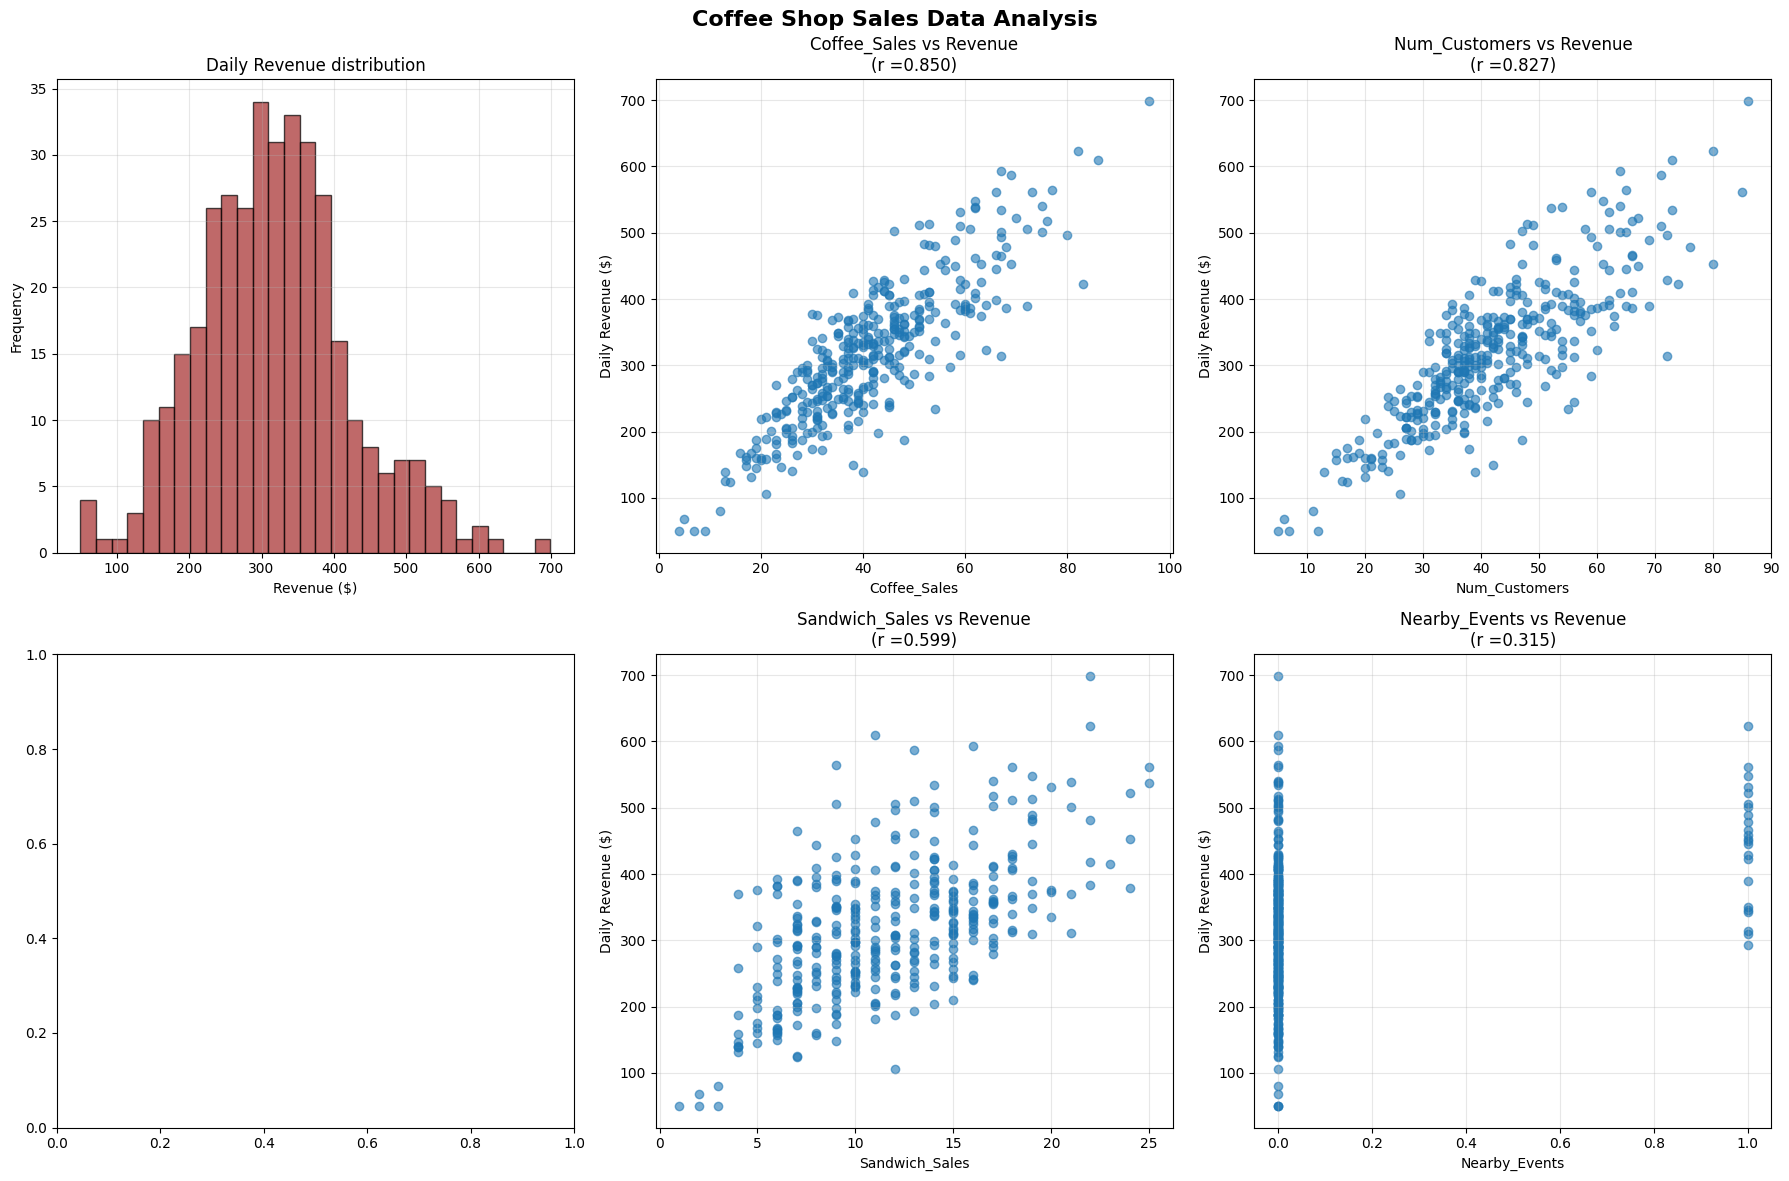

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Coffee Shop Sales Data Analysis', fontsize = 16, fontweight = 'bold')
axes[0,0].hist(y, bins = 30, alpha = 0.7, color= 'brown',edgecolor= 'black')
axes[0,0].set_title('Daily Revenue distribution')
axes[0,0].set_xlabel('Revenue ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha = 0.3)
top_feature = correlation.head(6)[1:].index
for i, feature in enumerate(top_feature):
    if i < 5:
        row = i // 3
        col = (i+1) % 3
        if row == 0 and col == 0 :
            continue 
        axes[row, col].scatter(df[feature], y, alpha =0.6 )
        axes[row, col].set_title(f'{feature} vs Revenue\n(r ={correlation[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Daily Revenue ($)')
        axes[row, col].grid(True, alpha = 0.3)
plt.tight_layout()
plt.show  

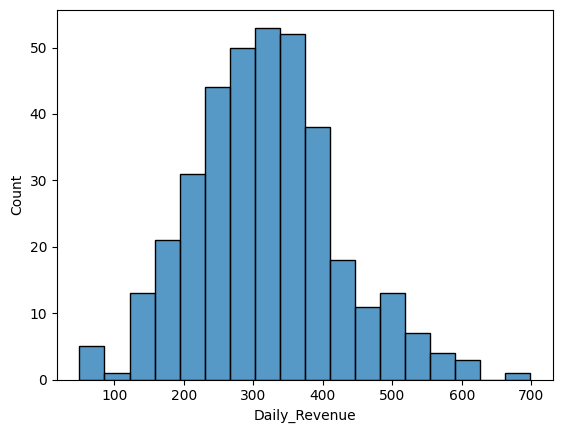

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Daily_Revenue'])
plt.show()


 Feature HeatMap: ['Coffee_Sales', 'Num_Customers', 'Pastry_Sales', 'Sandwich_Sales', 'Nearby_Events', 'Customer_Satisfaction', 'Is_Weekend', 'Temperature_C', 'Staff_Count', 'Is_Holiday']


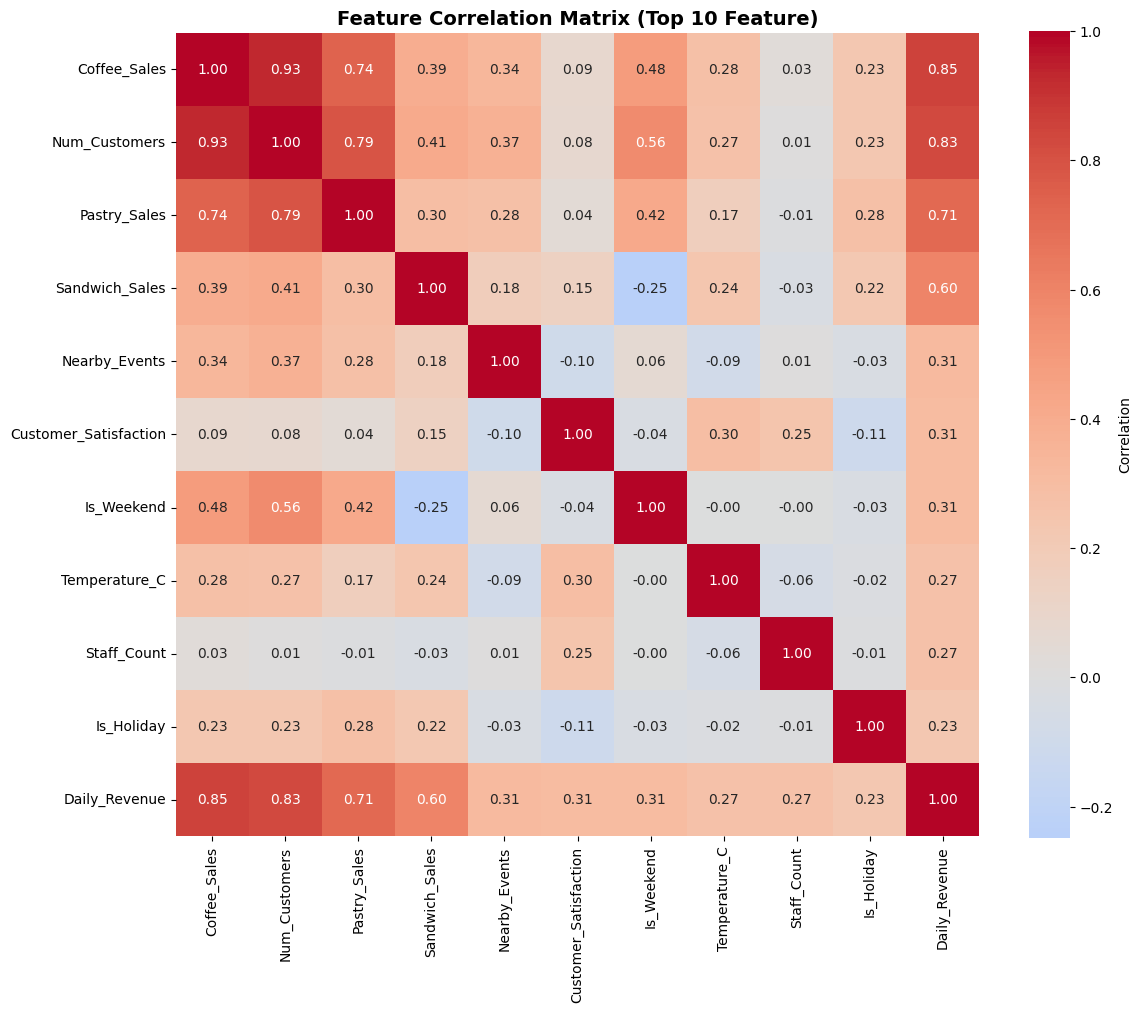

In [19]:
plt.figure(figsize=(12, 10))
impotant_feature = correlation.head(11)[1:].index[:10]
print(f'\n Feature HeatMap: {list(impotant_feature)}')
corr_matrix = df[list(impotant_feature)+ ['Daily_Revenue']].corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', center= 0, square = True, fmt ='.2f',
cbar_kws = {'label':'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Feature)', fontsize = 14,fontweight = 'bold')
plt.tight_layout() 
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

print('\n Daata Split: ')
print(f'Training set: {x_train.shape[0]} samples')
print(f'Test set:{x_test.shape[0]} samples')


 Daata Split: 
Training set: 273 samples
Test set:92 samples


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled  = scaler.transform(x_test)  

In [22]:
x_train_scaled

array([[-0.25061126, -0.64382278, -0.17428193, ..., -0.48223926,
        -0.94354114,  0.49666115],
       [ 0.78600804, -0.64382278,  0.72911616, ...,  0.43839932,
         1.08071608, -1.32331863],
       [-0.52704307,  1.55322246, -0.47541462, ..., -0.48223926,
        -0.43747684, -0.41332874],
       ...,
       [ 0.855116  , -0.64382278,  0.72911616, ...,  0.43839932,
         0.57465178, -1.32331863],
       [ 1.61530349, -0.64382278,  1.63251425, ...,  1.35903791,
        -1.44960545,  1.40665104],
       [-0.80347489, -0.64382278, -0.77654732, ..., -0.48223926,
         0.57465178, -0.41332874]], shape=(273, 20))

In [23]:
print('Feature scaler using StandardScaler')
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)
selector = SelectKBest(score_func=f_regression, k=15)
x_train_selected = selector.fit_transform(x_train_scaled, y_train)
x_test_selected  = selector.transform(x_test_scaled)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

Feature scaler using StandardScaler
Selected features: ['Is_Weekend', 'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Is_Holiday', 'Promotion_Active', 'Nearby_Events', 'Staff_Count', 'Machine_Issues', 'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction', 'Season_Encoded']


In [24]:
print('\nTraning Linear Regression Model: ')
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_selected, y_train)

print('Traied Successfully!')


Traning Linear Regression Model: 
Traied Successfully!


In [25]:
model.fit(x_train_selected, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
x_train_scaled = selector.fit_transform(x_train_scaled, y_train)

In [27]:
y_pred_train = model.predict(x_train_selected)
y_pred_test = model.predict(x_test_selected)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_test = model.predict(x_test_selected)

r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


In [29]:
def calculater_metrics(y_true, y_pred, dataset_name):
    #Calculation
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    #Addition 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    print(f'\n {dataset_name} Set performanace: ')
    print(f'R2 Score: {r2: .4f}')
    print(f'RMSE: ${rmse:.2f}')
    print(f'MAE:$ {mae:.2f}')
    print(f'MAPE: {mape: .2f}%')
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

In [30]:
train_metrics = calculater_metrics(y_train, y_pred_train, 'Training')
test_metrics = calculater_metrics(y_test,y_pred_test,'Training')


 Training Set performanace: 
R2 Score:  0.9573
RMSE: $21.21
MAE:$ 16.27
MAPE:  5.73%

 Training Set performanace: 
R2 Score:  0.9500
RMSE: $24.18
MAE:$ 18.97
MAPE:  8.55%


In [31]:
print(f'Overfiting Check: ')
print(f'R2 difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}')
if abs(train_metrics['R2'] - test_metrics['R2'])< 0.05:
    print('Mode appears to generalize well is Low Overfiting')
else: 
    print('Potential Overfiting Detected')

Overfiting Check: 
R2 difference (Train - Test): 0.0073
Mode appears to generalize well is Low Overfiting


In [32]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_.ravel(),
    'Abs_Coefficient': np.abs(model.coef_.ravel())
}).sort_values('Abs_Coefficient', ascending=False)

print(feature_importance.head(10))

             Feature  Coefficient  Abs_Coefficient
10      Coffee_Sales    57.923122        57.923122
12    Sandwich_Sales    36.989731        36.989731
7        Staff_Count    27.588480        27.588480
11      Pastry_Sales    24.522566        24.522566
8     Machine_Issues   -22.988599        22.988599
5   Promotion_Active   -12.568612        12.568612
0         Is_Weekend     3.944635         3.944635
6      Nearby_Events    -3.720329         3.720329
9      Num_Customers     2.500226         2.500226
3        Rainfall_mm     2.475086         2.475086


In [33]:
print('\nModel Interpretation: ')
print(f'Intercept: ${model.intercept_:.2f}')


Model Interpretation: 
Intercept: $323.40


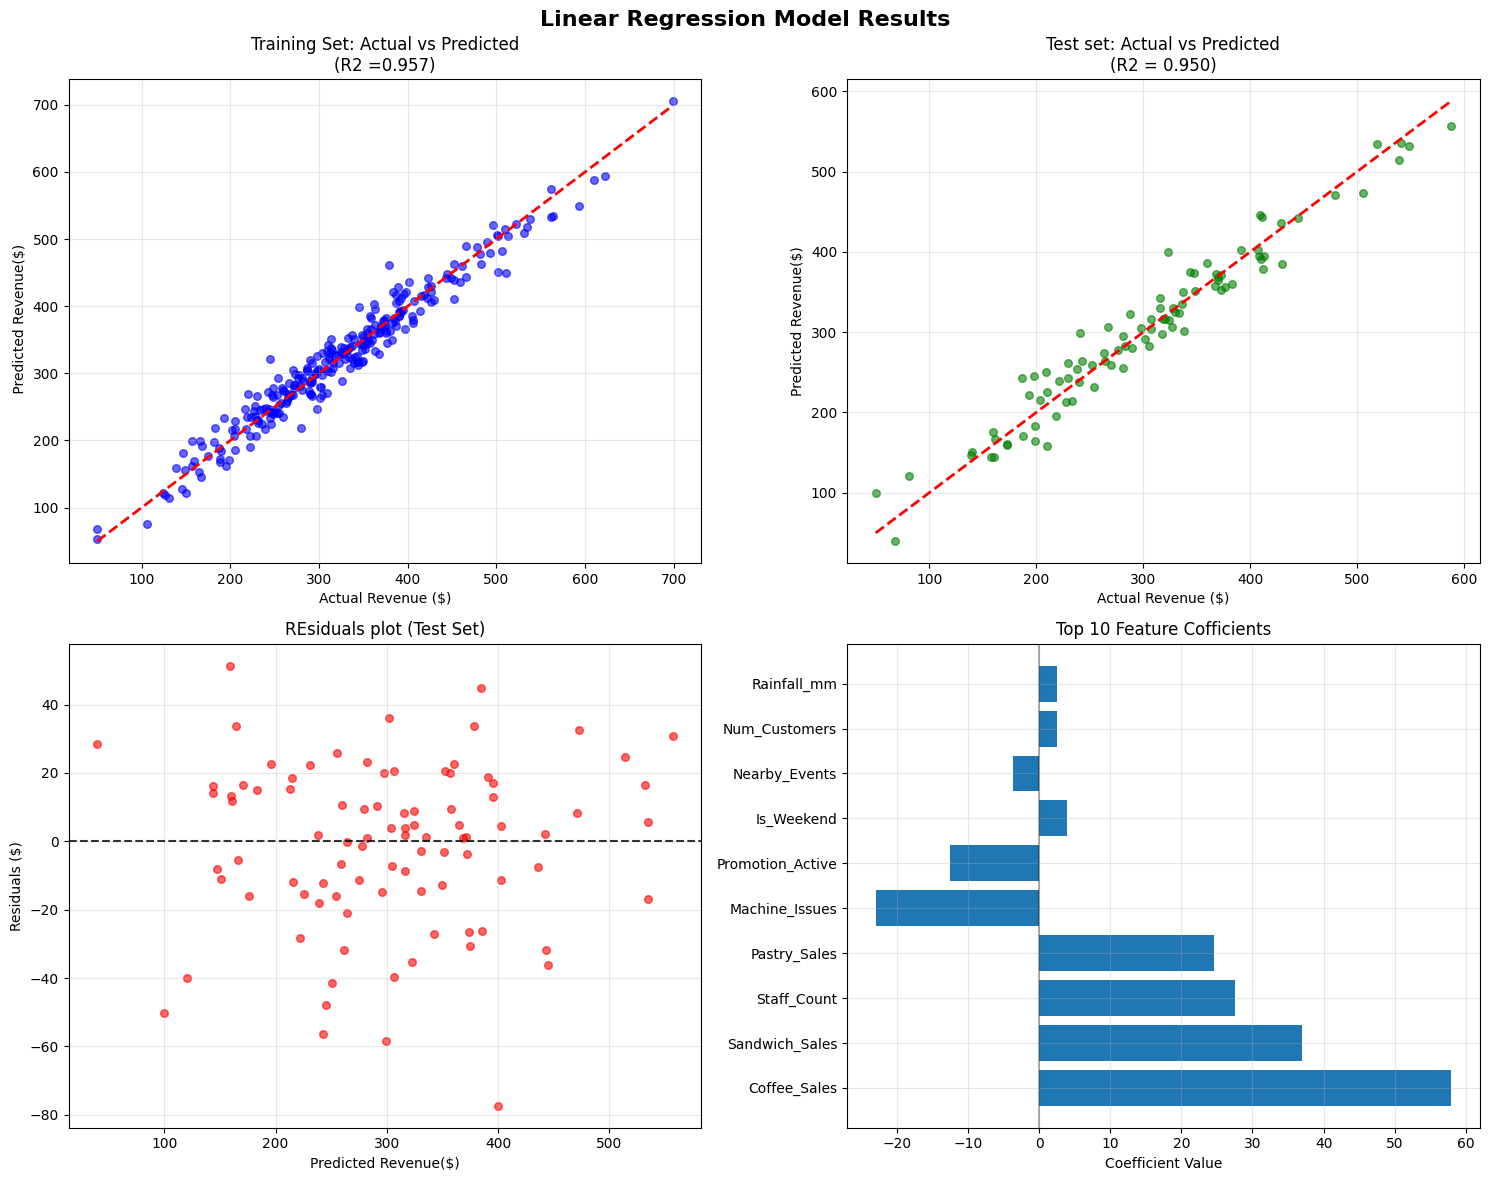

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize = 16, fontweight = 'bold')
#ac
axes[0,0].scatter(y_train, y_pred_train, alpha = 0.6, color ='blue', s = 30)
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Revenue ($)')
axes[0,0].set_ylabel(' Predicted Revenue($)')
axes[0,0].set_title(f'Training Set: Actual vs Predicted\n(R2 ={train_metrics['R2']:.3f})')
axes[0,0].grid(True, alpha = 0.3)
#Re
axes[0,1].scatter(y_test, y_pred_test, alpha = 0.6, color = 'green', s = 30)
axes[0,1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Revenue ($)')
axes[0,1].set_ylabel('Predicted Revenue($)')
axes[0,1].set_title(f'Test set: Actual vs Predicted\n(R2 = {test_metrics['R2']:.3f})')
axes[0,1].grid(True, alpha = 0.3)
#Re
residuals_test = y_test - y_pred_test
axes[1,0].scatter(y_pred_test, residuals_test, alpha=0.6, color = 'red', s=30)
axes[1,0].axhline(y=0, color = 'black', linestyle='--',alpha=0.8)
axes[1,0].set_xlabel('Predicted Revenue($)')
axes[1,0].set_ylabel('Residuals ($)')
axes[1,0].set_title('REsiduals plot (Test Set)')
axes[1,0].grid(True, alpha = 0.3)
#Re
top_feature_plot = feature_importance.head(10)
axes[1,1].barh(range(len(top_feature_plot)), top_feature_plot['Coefficient'])
axes[1,1].set_yticks(range(len(top_feature_plot)))
axes[1,1].set_yticklabels(top_feature_plot['Feature'])
axes[1,1].set_xlabel('Coefficient Value')
axes[1,1].set_title('Top 10 Feature Cofficients')
axes[1,1].axvline(x=0, color = 'black', linestyle ='-',alpha= 0.3)
axes[1,1].grid(True, alpha= 0.3)
plt.tight_layout()
plt.show()

In [35]:
feature_names = X.columns

In [36]:
print('Example Prediction:')
print('-' * 40)

scenarios = [
    {
        'name': 'Perfect WeekEndDay',
        'data': {
            'Day_of_Week':7, 'Is_Weekend':1,'Month': 6,'Temperature_C':25, 
            'Is_Raining': 0,'Rainfall_mm':0,'Is_Holiday':0,'Promotion_Active':1,
            'Nearby_Events': 1,'Staff_Count':5,'Machine_Issues':0,
            'Num_Customers':70,'Coffee_Sales':85,'Pastry_Sales':45,
            'Sandwich_Sales': 25,'Customer_Satisfaction':9.0,
            'Day_of_Year':150,'Quarter':2,
            'Day_Name_Encoded':6,'Season_Encoded':3
        }
    },
    {
        'name':'Rainy Weekday',
        'data': {
            'Day_of_Week':2, 'Is_Weekend':0,'Month': 11,'Temperature_C':8, 
            'Is_Raining': 1,'Rainfall_mm':5.5,'Is_Holiday':0,'Promotion_Active':0,
            'Nearby_Events': 0,'Staff_Count':3,'Machine_Issues':0,
            'Num_Customers':25,'Coffee_Sales':30,'Pastry_Sales':15,
            'Sandwich_Sales': 8,'Customer_Satisfaction':6.5,
            'Day_of_Year':300,'Quarter':4,
            'Day_Name_Encoded':1,'Season_Encoded':0 
        }
    },
    {
        'name':'Average Day',
        'data': {
            'Day_of_Week':4, 'Is_Weekend':0,'Month': 4,'Temperature_C':18, 
            'Is_Raining': 0,'Rainfall_mm':0,'Is_Holiday':0,'Promotion_Active':0,
            'Nearby_Events': 0,'Staff_Count':3,'Machine_Issues':0,
            'Num_Customers':45,'Coffee_Sales':50,'Pastry_Sales':22,
            'Sandwich_Sales': 15,'Customer_Satisfaction':7.5,
            'Day_of_Year':100,'Quarter':2,
            'Day_Name_Encoded':3,'Season_Encoded':2
        }
    }
]

for scenario in scenarios:
    sample_df = pd.DataFrame([scenario['data']])

    # 🔥 VERY IMPORTANT: same column order as training
    sample_df = sample_df[scaler.feature_names_in_]

    sample_scaled   = scaler.transform(sample_df)
    sample_selected = selector.transform(sample_scaled)
    prediction      = model.predict(sample_selected)[0]

    print(f"\n{scenario['name']}:")
    print(f"Predicted Revenue: ${prediction:.2f}")

    key_features = ['Num_Customers','Temperature_C','Promotion_Active','Staff_Count']
    for feature in key_features:
        print(f"{feature}: {scenario['data'][feature]}")


Example Prediction:
----------------------------------------

Perfect WeekEndDay:
Predicted Revenue: $682.98
Num_Customers: 70
Temperature_C: 25
Promotion_Active: 1
Staff_Count: 5

Rainy Weekday:
Predicted Revenue: $222.38
Num_Customers: 25
Temperature_C: 8
Promotion_Active: 0
Staff_Count: 3

Average Day:
Predicted Revenue: $373.01
Num_Customers: 45
Temperature_C: 18
Promotion_Active: 0
Staff_Count: 3


In [37]:
print('\nModel Summary:')
print(f'Moodel Successfully trained:{len(x_train)} Sample')
print(f'Test R2 Score:{test_metrics['R2']:.4f}')
print(f'Test RMSE: ${test_metrics['RMSE']:.2f}')
print(f'Model can predict coffee shop revenue with {test_metrics['R2']*100:.1f}% accuracy')
print(f'Most important factor: {feature_importance.iloc[0]['Feature']}')


Model Summary:
Moodel Successfully trained:273 Sample
Test R2 Score:0.9500
Test RMSE: $24.18
Model can predict coffee shop revenue with 95.0% accuracy
Most important factor: Coffee_Sales


In [38]:
import joblib
joblib.dump(model, 'coffee_sales_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'feature_selector.pkl')
print(' Model, Scaler and Selector saved Successfully!')

 Model, Scaler and Selector saved Successfully!
